# Setup

**GPU necessária**

In [3]:
# para manipular arrays
import numpy as np 

# para mostrar imagens
import matplotlib.pyplot as plt 

# para carregar o dataset MNIST
from tensorflow.keras.datasets import mnist 

# para criar modelos sequenciais e funcionais
from tensorflow.keras.models import Sequential, Model 

# para adicionar camadas densas
from tensorflow.keras.layers import Dense

%matplotlib inline

# Data Loading

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # carrega o dataset MNIST

# transforma a matriz 28x28 em um vetor de 784 elementos
x_train = x_train.reshape(-1, 28*28) / 255.0  # normaliza os valores dos pixels
x_test = x_test.reshape(-1, 28*28) / 255.0

print(x_train.shape, x_train.dtype) # mostra o shape e o tipo dos dados
print(x_test.shape, x_test.dtype)

(60000, 784) float64
(10000, 784) float64


# Autoencoder

In [5]:
# cria um modelo sequencial
model = Sequential() 

#encoder
# camada de entrada
model.add(Dense(units=512, activation='relu', input_shape=(784,))) 
# camada oculta
model.add(Dense(units=128, activation='relu')) 
# camada de saída
model.add(Dense(units=2, activation='linear', name='encoded')) 

#decoder
model.add(Dense(units=128, activation='relu', name='dec_1')) 
model.add(Dense(units=512, activation='relu', name='dec_2')) 
# camada de saída
model.add(Dense(units=784, activation='linear', name='decoded')) 

# mostra um resumo do modelo:
model.summary() 

# compila o modelo:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy']) 
# treina o modelo:
hist = model.fit(x_train, x_train, batch_size=128, epochs=10, validation_data=(x_test, x_test)) 

/opt/homebrew/anaconda3/envs/sightxr/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded (Dense)                 │ (None, 2)              │           258 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_1 (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_2 (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoded (Dense)                 │ (None, 784)            │       402,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 936,466 (3.57 MB)

 Trainable params: 936,466 (3.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0086 - loss: 0.0581 - val_accuracy: 0.0095 - val_loss: 0.0465
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0112 - loss: 0.0458 - val_accuracy: 0.0108 - val_loss: 0.0439
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0118 - loss: 0.0433 - val_accuracy: 0.0078 - val_loss: 0.0424
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0119 - loss: 0.0418 - val_accuracy: 0.0111 - val_loss: 0.0413
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0119 - loss: 0.0405 - val_accuracy: 0.0094 - val_loss: 0.0402
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0115 - loss: 0.0397 - val_accuracy: 0.0114 - val_loss: 0.0395
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0112 - loss: 0.0388 - val_accuracy: 0.0082 - val_loss: 0.0389
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0099 - loss: 0.0383 - val_accuracy: 0

In [7]:
im_dec = model.predict(x_test[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


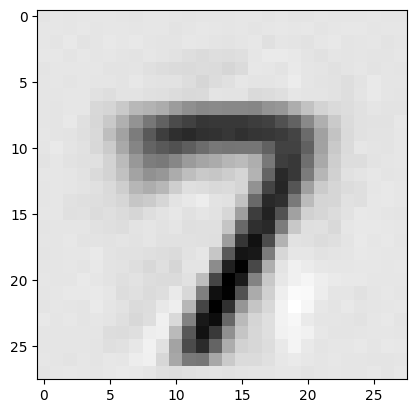

In [8]:
# para mostrar imagens
import matplotlib.pyplot as plt 
plt.imshow(im_dec.reshape(28, 28), cmap='gray_r')

1/1 [==============================] - 0s 21ms/step


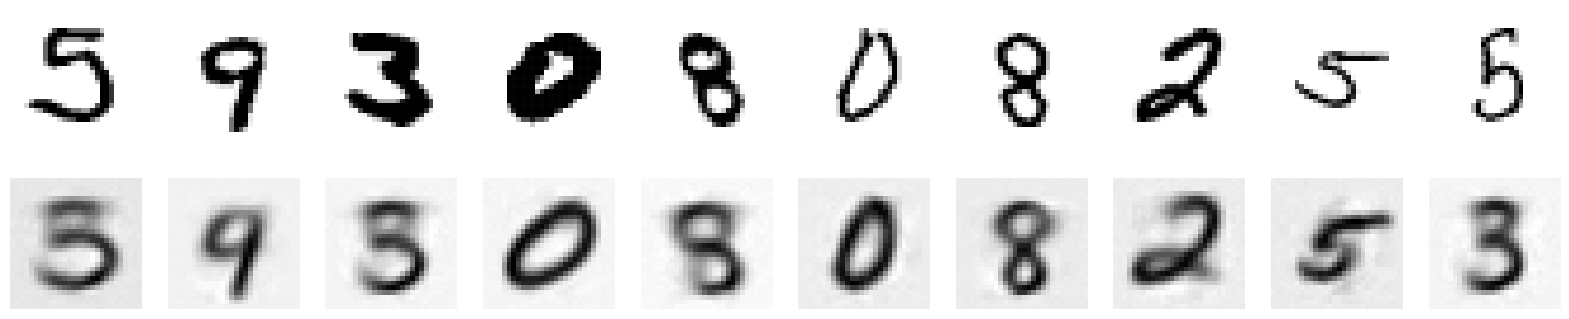

In [9]:
n_imgs = 10

random_idxs = np.random.choice(range(x_test.shape[0]), size=n_imgs)
im_ori = x_test[random_idxs]
im_dec = model.predict(im_ori)

plt.figure(figsize=(20, 4))
for i in range(n_imgs):
    ax = plt.subplot(2, n_imgs, i + 1, frameon=False)
    plt.imshow(im_ori[i].reshape(28, 28), cmap='gray_r')
    ax.set_axis_off()
    ax2 = plt.subplot(2, n_imgs, i + 1 + n_imgs, frameon=False)
    ax2.set_axis_off()
    plt.imshow(im_dec[i].reshape(28, 28), cmap='gray_r')

# Visualizando os embeddings

In [10]:
from tensorflow.keras.models import Model 
encoder = Model(inputs=model.input, 
                outputs=model.get_layer(name='encoded').output)

x_test_enc = encoder.predict(x_test)
x_test_enc.shape

313/313 [==============================] - 1s 3ms/step


(10000, 2)

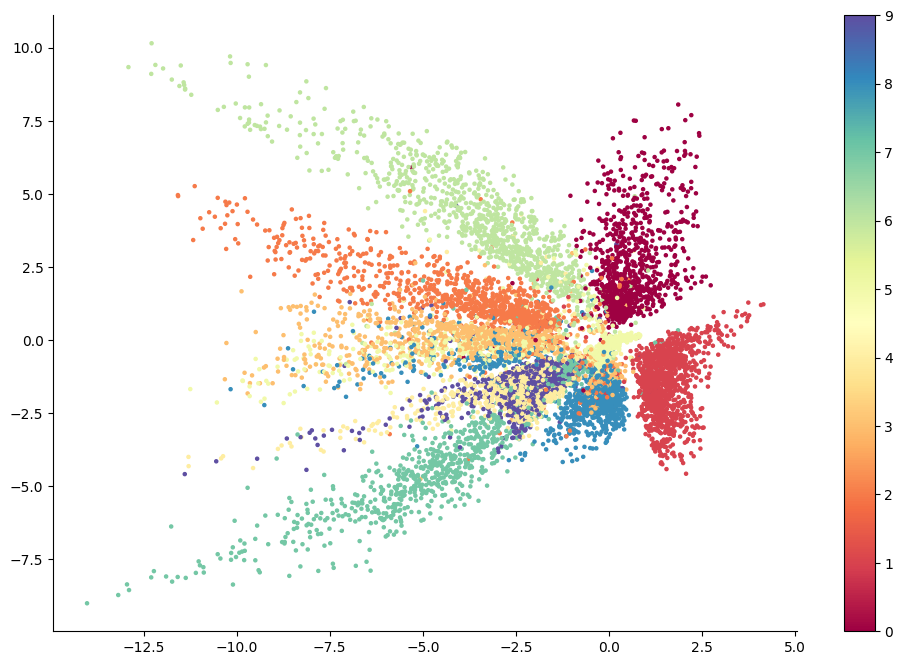

In [38]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(1, 1, 1, frameon=True)
plt.scatter(x_test_enc[:, 0], x_test_enc[:, 1], c=y_test, cmap=plt.cm.Spectral, s=5)
plt.colorbar()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# Reconstruindo uma imagem

In [12]:
decoder = Sequential()
decoder.add(Dense(units=128, activation='relu', input_shape=(2,)))
decoder.add(Dense(units=512, activation='relu'))
decoder.add(Dense(units=784, activation='linear'))

weights = []
for layer in ['dec_1', 'dec_2', 'decoded']:
  w = model.get_layer(layer).get_weights()
  weights.append(w[0])
  weights.append(w[1])

decoder.set_weights(weights)

1/1 [==============================] - 0s 62ms/step


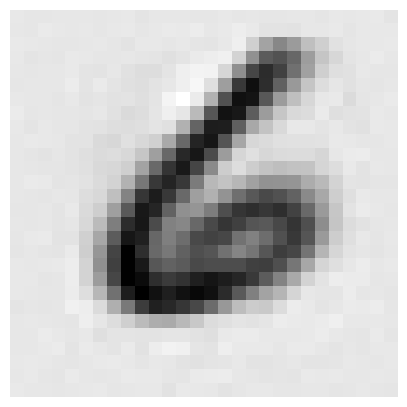

In [30]:
x = -2.5
y = 5
im_pred = decoder.predict(np.array([[x, y]])).reshape((28, 28))
fig = plt.figure(figsize=(5, 8))
ax = plt.subplot(1, 1, 1)
ax.set_axis_off()
plt.imshow(im_pred, cmap='gray_r')
plt.show()